# Projet Finance 

### Introduction: Problématique métier

Nous sommes dans le secteur bancaire et plus précisément dans l’attribution de prêt a des clients d’une banque. Le but de ce projet est de prévoir si tel ou tel client est autorisé à contracter un prêt. 
En d’autres terme classer nos clients en deux groupes distincts :
    • Autorisé à contracter un prêt
    • Non-autorisé
Pour ce faire la banque possède un certain nombre d’information sur le comportement de ces clients ou leurs informations personnelles.

### Traduction Machine Learning

Au vu de la problématique métier on est dans le cas d’un problème supervisé de Machine Learning et plus précisément dans un cas de classification. 

Nous pouvons donc imaginer partir sur des modèles tel que des Decision Tree (Classifier), des random forest et autres Xgboost.

Les metrics pour évaluer nos modèles sont dans ce cas l’accuracy, le recall ou encore la précision. 

<font color="green">Il faut peut-être voir avec le client si il préfère privilégier le fait de n’omettre aucun client qui puisse théoriquement contracté un prêt (Au risque d’augmenter l’accession au crédit à des clients à risque).  Ou au contraire si il veut minimiser les clients à risque au détriment de clients potentiellement viable
</font> 

En fonction de cette réponse on privilégiera :
    • Le score de « Recall » dans le premier cas.
    • Le score de « Precision » dans le second cas. 
    • Autrement on peut-équilibrer cela grace au F1 score.

<font color= "green">Il pourrait être intéressant de savoir si la banque à un seuil de clients à risque qu’elle accepte de prendre  car cela pourrait nous permettre de fixer un seuil de recall / precision qui conviennent à ces attentes. </font>

## Importation library

In [19]:
# Librairie général de python pour des opération communes
import pandas as pd
import numpy as np
from pandasgui import show # Fonction permettant une visualisation approfondie 
#d'une dataframe pandas sur un interface graphique avancée.


#Librairie de visualisation principale
import seaborn as sns 
import matplotlib.pyplot as plt
import graphviz
import missingno as msno

## Sommaire

- [1 : Importation des données](#1)
- [2 : Compréhension des données](#2)

### <a id='1'><center><font color="INDIANRED">1) Importation des données</font></center></a>

Nous avons deux dataset "différents" stocké avec deux méthodes différentes examinons tout d'abords les différences entre ces deux fichier. 

### Comparaison des datasets

In [21]:
df_csv= pd.read_csv('train.csv')
df_xls=pd.read_excel('train.xlsx')

On visualise d'abords nos deux DF de manière supperficielle  pour voir si les deux correpondent.

In [22]:
df_csv

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
df_xls

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


On vérifie la liste de nos colonnes. 

In [35]:
print(df_csv.columns)
print(df_xls.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


On continue notre exploration en regardant le type et le nombre de valeurs réel de nos datasets

In [24]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
df_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Enfin on vérifie les grands indicateurs statistique de nos données numétiques. 

In [27]:
df_csv.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df_xls.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Conclusion

Les deux datasets présente des carractéritiques similaire :
<ul><li>Même nombre de colonnes </li>
    <li>Même nombre de lignes</li>
    <li>Même nombre de valeurs manquante</li>
    <li>Indicateurs statistiques égaux</li>
On peut donc partir du postulat que nos datasets sont identiques nous ne travaillerons donc que sur le dataset en csv 

### <a id='1'><center><font color="INDIANRED">2) Compréhension des données</font></center></a>

### Compréhension des variable

In [41]:
df=df_csv

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Nous avons donc 13 colonnes dans ce dataset dont une target (Loan_Status):

<b>Variables Indépendante</b>
<ul><li> Loan_ID : Un ID représentant uniquement chaque clients (Type: String)</li>
    <li>Gender : Le genre de notre client (Type: String) </li>
    <li>Married: Booleen représentant si notre client est marié(e) ou non (Type: Bool) </li>
    <li>Dependents: nombre de personne à charge sur le client (Type: Integer) </li>
    <li> Education: Booleen représentant si la personne est diplomé ou non (Type: Bool) </li>
    <li>Self_Employed: Booleen représentant si la personne est auto entrepreuneur (Type: bool) </li>
    <li>ApplicantIncome: Les revenus du client (Type: Float) </li>
    <li>CoapplicantIncome: Les revenus d'une personne associé au client (Mari / femme, parents...) (Type: Float)</li>
    <li>LoanAmount: Montant de l'emprunt (En centaine) (Type: Float)</li>
    <li>Loan_Amount_Term: Montant des remboursement par mois(Type: Float) </li>
    <li>Credit_History: existe-il des antécédants de crédit.(Type: Bool)</li>
    <li>Property_Area: La zone de l'habitation. (Type: String) </li></ul>

<b>Notre Target</b>

<ul><li>Loan_Status: Représente si un crédit est accordé ou non en fonction des autres variables indépendantes</li></ul>

### Visualisation des distributions

Voyons les répartition de nos différents groupe

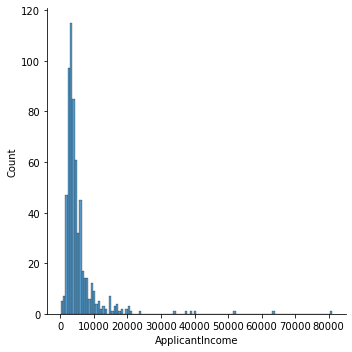

In [47]:

for x in 

sns.displot(df.ApplicantIncome)